In [476]:
%matplotlib notebook
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from sympy import MatMul

from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import subprocess
from IPython.display import HTML
from IPython import display
from mpmath import *
from scipy import special

In [501]:
r,z,a,K,E,m,phi,x,y=sp.symbols('r,z,a,K,E,m,phi,x,y')
Cart=sp.Matrix([[sp.cos(phi),-sp.sin(phi),0],[sp.sin(phi),sp.cos(phi),0],[0,0,1]])

In [502]:
def K1(m1):
    #return float(abs(ellipk(m1)))
    return special.ellipk(m1, out=None)

def E1(m1):
    #return float(abs(ellipe(m1)))
    return special.ellipe(m1, out=None)


In [503]:
KK=np.vectorize(K1)
EE=np.vectorize(E1)

In [504]:

#Br=a*z/(2*sp.pi*(2*r*a)**(3/2))*(sp.sqrt(2*m)*KK(0)-((2-m)/(2-2*m))*sp.sqrt(2*m)*EE(0))
##Bz1= a/(2*sp.pi*(2*r*a)**(3/2))*((m*E*sp.sqrt(2*m)*a**2/(2-2*m))-r*(sp.sqrt(2*m)*KK(0)-((EE(0)*(2-m)*sp.sqrt(2*m)/(2-2*m)))))
#B=sp.Matrix([Br,0,Bz1])

In [505]:
u0=4*np.pi*10**-7
k=u0/(2*sp.pi)

Br=a*z/((2*r*a)**(3/2))*sp.sqrt(2*m)*(K-((2-m)/(2-2*m))*E)
Bz1= a/((2*r*a)**(3/2))*sp.sqrt(2*m)*(((m*E*a)/(2-2*m))+r*(K-((E*(2-m)/(2-2*m)))))
B=sp.Matrix([-Br,0,Bz1])

In [506]:
B

Matrix([
[                   -0.353553390593274*sqrt(2)*a*sqrt(m)*z*(-E*(2 - m)/(2 - 2*m) + K)/(a*r)**1.5],
[                                                                                              0],
[0.353553390593274*sqrt(2)*a*sqrt(m)*(E*a*m/(2 - 2*m) + r*(-E*(2 - m)/(2 - 2*m) + K))/(a*r)**1.5]])

In [507]:
Bxyz=sp.simplify(Cart*B)

In [508]:
Cart

Matrix([
[cos(phi), -sin(phi), 0],
[sin(phi),  cos(phi), 0],
[       0,         0, 1]])

In [509]:
-Br

-0.353553390593274*sqrt(2)*a*sqrt(m)*z*(-E*(2 - m)/(2 - 2*m) + K)/(a*r)**1.5

In [510]:
Bz1

0.353553390593274*sqrt(2)*a*sqrt(m)*(E*a*m/(2 - 2*m) + r*(-E*(2 - m)/(2 - 2*m) + K))/(a*r)**1.5

In [511]:
Bx=sp.lambdify([a,r,phi,z,K,E,m],Bxyz[0])
By=sp.lambdify([a,r,phi,z,K,E,m],Bxyz[1])
Bz=sp.lambdify([a,r,phi,z,K,E,m],Bxyz[2])

<IPython.core.display.Javascript object>


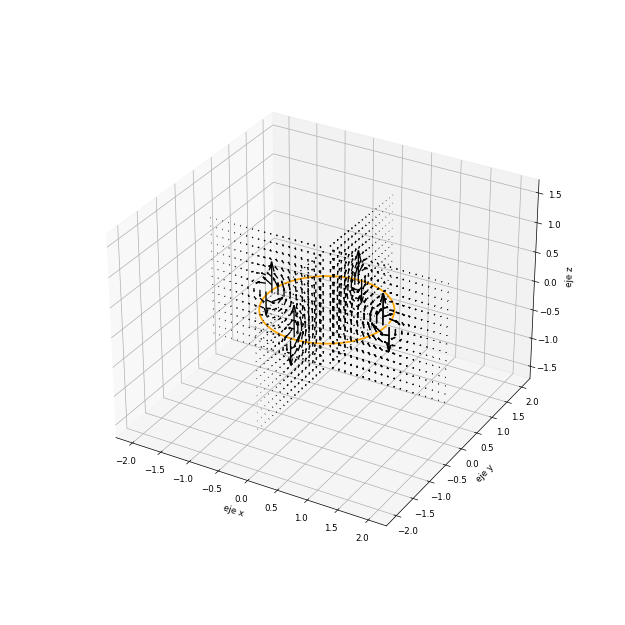

C:\Users\Arif\AppData\Local\Temp\ipykernel_10280\868724191.py:15: RuntimeWarning: divide by zero encountered in divide
  mm=4*aa/(Z**2/R+2*aa+R+aa**2/R)#(4*aa*R)/(Z**2+(aa+R)**2)
C:\Users\Arif\AppData\Local\Temp\ipykernel_10280\868724191.py:15: RuntimeWarning: invalid value encountered in divide
  mm=4*aa/(Z**2/R+2*aa+R+aa**2/R)#(4*aa*R)/(Z**2+(aa+R)**2)


(-2.2, 2.2, -2.2, 2.2)

In [562]:
aa=1
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

#rr=np.linspace(aa-0.5,1.5*aa,10)
rr=np.linspace(0,2*aa,20)
pp=np.linspace(0,2*np.pi,5)
zz=np.linspace(-1,1,15)
R,P,Z=np.meshgrid(rr,pp,zz)

X=R*np.cos(P)
Y=R*np.sin(P)


mm=4*aa/(Z**2/R+2*aa+R+aa**2/R)#(4*aa*R)/(Z**2+(aa+R)**2)
#mm=4*aa*R/(Z**2+aa**2)
Bxx=Bx(aa,R,P,Z,KK(mm),EE(mm),mm)
Byy=By(aa,R,P,Z,KK(mm),EE(mm),mm)
Bzz=Bz(aa,R,P,Z,KK(mm),EE(mm),mm)

ppp=np.linspace(0.1,2*np.pi,100)
BB=np.sqrt(Bxx**2+Byy**2+Bzz**2)
ax.plot(aa*np.cos(ppp),aa*np.sin(ppp),ppp*0,color='orange',lw=2)
plt.xlabel('eje x')
plt.ylabel('eje y')
ax.set_zlabel('eje z')
ax.quiver(X,Y,Z,Bxx,Byy,Bzz,color='black',length=1/40)
#ax.quiver(X,Y,Z,Bxx/BB,Byy/BB,Bzz/BB,color='black',length=1/5)

plt.axis('equal')

<IPython.core.display.Javascript object>


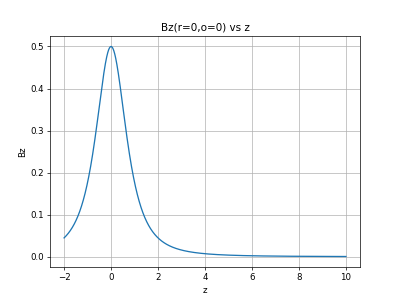

In [563]:
zz=np.linspace(-2,10,10000)
mm=4*aa*0/(zz**2+aa**2)
fig5=plt.figure()
BZ=aa**2/(2*(zz**2+aa**2)**(3/2))
plt.title('Bz(r=0,o=0) vs z')
plt.xlabel('z')
plt.ylabel('Bz')

plt.plot(zz,BZ)
plt.grid('on')

<IPython.core.display.Javascript object>


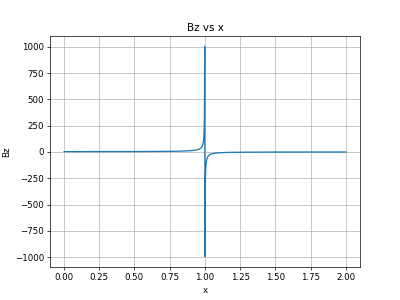

C:\Users\Arif\AppData\Local\Temp\ipykernel_10280\2889046768.py:3: RuntimeWarning: divide by zero encountered in divide
  mm=4*aa/(2*aa+rr+aa**2/rr)


In [565]:
fig=plt.figure()
rr=np.linspace(0,2*aa,1000)
mm=4*aa/(2*aa+rr+aa**2/rr)
BZZ=Bz(aa,rr,0*rr,rr*0,KK(mm),EE(mm),mm)
plt.title('Bz vs x')
plt.plot(rr,BZZ)
plt.xlabel('x')
plt.ylabel('Bz')
plt.grid('on')

# Potencial electrico A

<IPython.core.display.Javascript object>


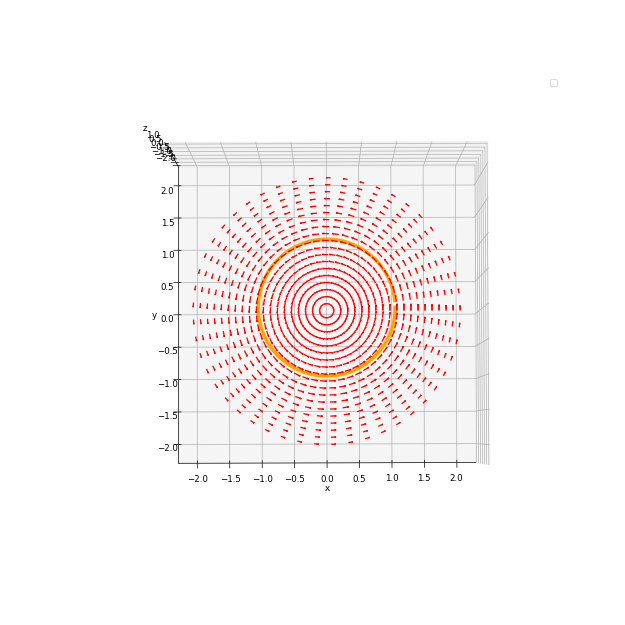

C:\Users\Arif\AppData\Local\Temp\ipykernel_10280\3183091739.py:14: RuntimeWarning: divide by zero encountered in divide
  mm=4*aa/(Z**2/R+2*aa+R+aa**2/R)#(4*aa*R)/(Z**2+(aa+R)**2)
C:\Users\Arif\AppData\Local\Temp\ipykernel_10280\3183091739.py:14: RuntimeWarning: invalid value encountered in divide
  mm=4*aa/(Z**2/R+2*aa+R+aa**2/R)#(4*aa*R)/(Z**2+(aa+R)**2)
<lambdifygenerated-304>:2: RuntimeWarning: divide by zero encountered in divide
  return sqrt(a/r)*(2*E/sqrt(m) - K*(2 - m)/sqrt(m))*sin(phi)
<lambdifygenerated-304>:2: RuntimeWarning: invalid value encountered in subtract
  return sqrt(a/r)*(2*E/sqrt(m) - K*(2 - m)/sqrt(m))*sin(phi)
<lambdifygenerated-305>:2: RuntimeWarning: divide by zero encountered in divide
  return -sqrt(a/r)*(2*E/sqrt(m) - K*(2 - m)/sqrt(m))*cos(phi)
<lambdifygenerated-305>:2: RuntimeWarning: invalid value encountered in subtract
  return -sqrt(a/r)*(2*E/sqrt(m) - K*(2 - m)/sqrt(m))*cos(phi)
No artists with labels found to put in legend.  Note that artists who

Text(0.5, 0, 'z')

In [560]:
#Ao=(a/sp.sqrt(2*a*r))*(4*E/sp.sqrt(2*m)-(2-m)*sp.sqrt(2*m)*K/m)
Ao=-sp.sqrt(a/r)*((4*E/(2*sp.sqrt(m)))-((2-m)*K*sp.sqrt(m)/m))
#Ao=(a/((2*a*r)**(3/2)))*(K*sp.sqrt(2/m)-2*E*sp.sqrt(2*m)/(4*m**2))
A=sp.Matrix([0,Ao,0])
Axyz=Cart*A
Ax=sp.lambdify([a,r,phi,z,K,E,m],Axyz[0])
Ay=sp.lambdify([a,r,phi,z,K,E,m],Axyz[1])
Az=sp.lambdify([a,r,phi,z,K,E,m],Axyz[2])
fig7 = plt.figure(figsize=(10,10))
bx = plt.axes(projection='3d')



mm=4*aa/(Z**2/R+2*aa+R+aa**2/R)#(4*aa*R)/(Z**2+(aa+R)**2)
#mm=4*aa*R/(Z**2+aa**2)
Axx=Ax(aa,R,P,Z,KK(mm),EE(mm),mm)
Ayy=Ay(aa,R,P,Z,KK(mm),EE(mm),mm)
Azz=Az(aa,R,P,Z,KK(mm),EE(mm),mm)

ppp=np.linspace(0.1,2*np.pi,100)
AA=np.sqrt(Axx**2+Ayy**2+Azz**2)
bx.plot(aa*np.cos(ppp),aa*np.sin(ppp),ppp*0,color='orange',lw=4)
#bx.quiver(X,Y,Z,Axx/AA,Ayy/AA,Azz/AA,color='red',length=1/5,label='Potencial A')
#bx.quiver(X,Y,Z,Bxx/BB,Byy/BB,Bzz/BB,color='black',length=1/10,label='Campo magnetico B')
#bx.quiver(X,Y,Z,Axx,Ayy,Azz,color='red',length=1/7,label='Potencial A')

bx.quiver(X[:,:,0].reshape(-1),Y[:,:,0].reshape(-1),Z[:,:,0].reshape(-1),Axx[:,:,0].reshape(-1),Ayy[:,:,0].reshape(-1),0*Axx[:,:,0].reshape(-1),color='red',length=1/4)
plt.legend()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
bx.set_zlabel('z')

In [520]:
m1=4*a*r/(z**2+(a+r)**2)
m1


4*a*r/(z**2 + (a + r)**2)

In [521]:
Ao

sqrt(a/r)*(2*E/sqrt(m) - K*(2 - m)/sqrt(m))

In [522]:

#CA=sp.simplify(sp.Matrix([-(1/r)*sp.diff(r*A[1],z),0,(1/r)*sp.diff(r*A[1],r)]))

# derivadas de K y E

In [523]:
dKdm=(1/2)*((E/(m*(1-m))-K/m))
dEdm=(1/2)*((E-K)/m)

In [532]:
CA=sp.simplify(sp.Matrix([-(sp.diff(A[1],z)+sp.diff(A[1],K)*dKdm*sp.diff(m1,z)+sp.diff(A[1],E)*dEdm*sp.diff(m1,z)+sp.diff(A[1],m)*sp.diff(m1,z)),
                          0,
                          (1/r)*(sp.diff(A[1]*r,r)+sp.diff(A[1]*r,K)*dKdm*sp.diff(m1,r)+sp.diff(A[1]*r,E)*dEdm*sp.diff(m1,r)+sp.diff(A[1]*r,m)*sp.diff(m1,r))]))

In [533]:
sp.simplify(CA)

Matrix([
[                                                                                                                                                                        a*r*z*sqrt(a/r)*(-8.0*(E - K)*(m - 1) + 4.0*(E + K*(m - 1))*(m - 2) + 4*(m - 1)*(2*E - 2*K*m + K*(m - 2)))/(m**(3/2)*(m - 1)*(z**2 + (a + r)**2)**2)],
[                                                                                                                                                                                                                                                                                                                           0],
[sqrt(a/r)*(-8.0*a*r*(E - K)*(m - 1)*(-2*r*(a + r) + z**2 + (a + r)**2) + 4.0*a*r*(E + K*(m - 1))*(m - 2)*(-2*r*(a + r) + z**2 + (a + r)**2) + 4*a*r*(m - 1)*(2*E - 2*K*m + K*(m - 2))*(-2*r*(a + r) + z**2 + (a + r)**2) - m*(2*E + K*(m - 2))*(m - 1)*(z**2 + (a + r)**2)**2)/(2*m**(3/2)*r*(m - 1)*(z**2 + (a + r)**2)**2)]])

In [534]:
mmm=4*1/(1+(1+1)**2)
K3=KK(mmm)
E3=EE(mmm)
Dif=(B.subs(m,m1)-CA).subs(m,m1).subs(r,1).subs(a,1).subs(z,1).subs(K,K3).subs(E,E3)
float(Dif[0])


-3.389148532322937e-16

In [535]:
float(Dif[2])

8.90933473612742e-18